## Waste Classification using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "DATASET\DATASET\TRAIN"
test_path = "DATASET\DATASET\TEST"

In [4]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# visualization
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [01:36<00:00, 104.09it/s]


In [6]:
data.shape

(22564, 2)

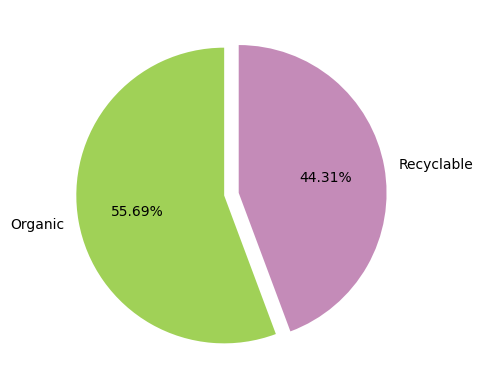

In [7]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors)
plt.show()

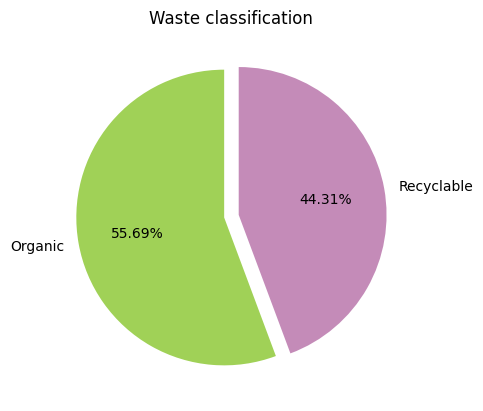

In [8]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors)
plt.title('Waste classification')
plt.show()

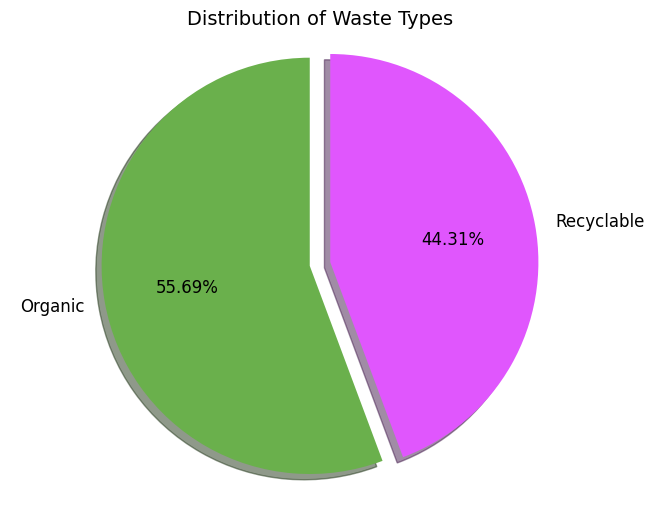

In [9]:
colors = ['#6ab04c', '#e056fd']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors=colors, shadow=True, textprops={'fontsize': 12})
plt.title('Distribution of Waste Types', fontsize=14)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()